<a href="https://colab.research.google.com/github/Sudeepam97/Guess_the_doodle/blob/master/doodle_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## Load the Drive helper and mount
from google.colab import drive

## This will prompt for authorization.
drive.mount('/content/drive')

In [2]:
## Set the preferred path
%cd drive/My\ Drive/Projects/doodle/

/content/drive/My Drive/Projects/doodle


In [0]:
## Define a function to read the output classes
def read_classes():
  f = open ("classes", "r")
  out_classes = f.readlines()
  f.close()
  for i in range(0, len(out_classes)):
    out_classes[i] = out_classes[i].replace('\n', '').replace(' ', '_')
  return out_classes

In [4]:
## Call
out_classes = read_classes()
print (out_classes)

['axe', 'airplane', 'apple', 'banana', 'baseball', 'baseball_bat', 'birthday_cake', 'book', 'bucket', 'bus', 'candle', 'camera', 'car', 'cell_phone', 'cloud', 'coffee_cup', 'crown', 'dolphin', 'donut', 'dumbbell', 'envelope', 'eye', 'eyeglasses', 'finger', 'fish', 'flashlight', 'flower', 'fork', 'golf_club', 'hammer', 'hand', 'headphones', 'hot_air_balloon', 'hourglass', 'ice_cream', 'key', 'knife', 'ladder', 'leaf', 'light_bulb', 'lightning', 'mountain', 'mushroom', 'octagon', 'pencil', 'pliers', 'screwdriver', 'see_saw', 'star', 'sword', 'syringe', 'tooth', 'toothbrush', 'traffic_light', 't-shirt', 'umbrella', 'vase', 'windmill', 'wine_glass', 'zigzag']


In [0]:
## Define a function to download the data and store it in our Google drive.
def obtain_dataset():
  
  import urllib.request
  base_url = "https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/"
  category = ''
  
  for i in range(0, len(out_classes)):
    ## Create URL
    category = out_classes[i].replace('_', '%20')
    url = base_url + category + ".npy"
    ## Fetch...
    print ("downloading " + url + " ..." )
    urllib.request.urlretrieve(url, "dataset/" + out_classes[i] + ".npy")

In [0]:
## Call
%mkdir dataset
obtain_dataset()

downloading https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/axe.npy ...
downloading https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy ...
downloading https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy ...
downloading https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/banana.npy ...
downloading https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball.npy ...
downloading https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy ...
downloading https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/birthday%20cake.npy ...
downloading https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy ...
downloading https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bucket.npy ...
downloading https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bus.npy ...
downloading https://storage.googleapis.com/quick

In [5]:
## Import the modules required to create our model.
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers

Using TensorFlow backend.


In [6]:
%cd dataset
print()
%ls

/content/drive/My Drive/Projects/doodle/dataset

airplane.npy       coffee_cup.npy  hand.npy             pliers.npy
apple.npy          crown.npy       headphones.npy       screwdriver.npy
axe.npy            dolphin.npy     hot_air_balloon.npy  see_saw.npy
banana.npy         donut.npy       hourglass.npy        star.npy
baseball_bat.npy   dumbbell.npy    ice_cream.npy        sword.npy
baseball.npy       envelope.npy    key.npy              syringe.npy
birthday_cake.npy  eyeglasses.npy  knife.npy            toothbrush.npy
book.npy           eye.npy         ladder.npy           tooth.npy
bucket.npy         finger.npy      leaf.npy             traffic_light.npy
bus.npy            fish.npy        light_bulb.npy       t-shirt.npy
camera.npy         flashlight.npy  lightning.npy        umbrella.npy
candle.npy         flower.npy      mountain.npy         vase.npy
car.npy            fork.npy        mushroom.npy         windmill.npy
cell_phone.npy     golf_club.npy   octagon.npy          wine_gl

In [0]:
## A function to load the data and split it into training and test sets.
def load_dataset():
  ## Initialize variables
  X = np.empty([0, 784])
  Y = np.empty([0, 1])
  images_per_class = 12000
  test_set_size = 10000
  
  ## Load the dataset
  for i in range(0, len(out_classes)):
    imgs = np.load((out_classes[i] + ".npy"))   # Load images of a given doodle
    imgs = imgs[0 : images_per_class, :]        # Select the first 12000 images
    labels = np.full((images_per_class, 1), i)  # Create labels for the given doodle
    X = np.concatenate((X, imgs), axis = 0)     # Concatenate examples of each doodle
    Y = np.concatenate((Y, labels), axis = 0)   # Concatenate the labels
    del imgs          # Take extra care to make sure we don't run out of memory.

  ## Randomise the dataset
  np.random.seed(1)
  order = np.random.permutation(Y.shape[0])
  X = X[order, :]
  Y = Y[order, :]
  
  ## Split the data into training and test sets
  X_test = X[0 : test_set_size, :]
  Y_test = Y[0 : test_set_size, :]
  X_train = X[test_set_size : X.shape[0], :]
  Y_train = Y[test_set_size : Y.shape[0], :]
  
  return X_train, Y_train, X_test, Y_test

In [0]:
## Load the dataset
X_train, Y_train, X_test, Y_test = load_dataset()

In [9]:
## Sanity check the shape of out input.
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape: (710000, 784)
Y_train shape: (710000, 1)
X_test shape:  (10000, 784)
Y_test shape:  (10000, 1)


envelope


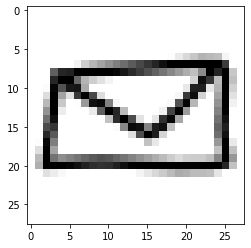

In [10]:
## Visualize an image (Try changing the index below)
ind = 900
img = X_train[ind].reshape(28, 28)
print(out_classes[int(Y_train[ind])])
plt.imshow(img, cmap='gray_r')
plt.show()

In [0]:
## Reshape image vectors.
image_size = 28
X_train = X_train.reshape(X_train.shape[0], image_size, image_size, 1)
X_test = X_test.reshape(X_test.shape[0], image_size, image_size, 1)

## Pad the images to centre the content
X_train = np.pad(X_train, ((0,0), (2,2), (2,2), (0,0)), mode='constant')
X_test = np.pad(X_test, ((0,0), (2,2), (2,2), (0,0)), mode='constant')

## Create one hot vectors for class labels.
Y_train = keras.utils.to_categorical(Y_train, len(out_classes))
Y_test = keras.utils.to_categorical(Y_test, len(out_classes))

## Normalize the dataset
X_train = X_train / 255
X_test = X_test / 255

In [12]:
## Sanity check the shape of data-sets.
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape: (710000, 32, 32, 1)
Y_train shape: (710000, 60)
X_test shape:  (10000, 32, 32, 1)
Y_test shape:  (10000, 60)


In [0]:
def create_model(input_shape):
  model = keras.Sequential()
  
  model.add(layers.Conv2D(6, (5, 5), input_shape = input_shape, activation = 'relu'))
  model.add(layers.BatchNormalization(axis = 3))
  model.add(layers.MaxPooling2D(pool_size = (2, 2)))
  
  model.add(layers.Conv2D(16, (5, 5), activation = 'relu'))
  model.add(layers.BatchNormalization(axis = 3))
  model.add(layers.MaxPooling2D(pool_size = (2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(120, activation = 'relu'))
  model.add(layers.Dense(84, activation = 'relu'))
  model.add(layers.Dense(60, activation = 'softmax')) 
  
  return model

In [20]:
## Create the model
doodle_model = create_model((X_train.shape[1], X_train.shape[2], 1))
print (doodle_model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 6)         24        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
batch_normalization_6 (Batch (None, 10, 10, 16)        64        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)              

In [0]:
## Compile the model
doodle_model.compile (optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Epoch 1/15
710000/710000 [==============================] - 38s 54us/step - loss: 0.9584 - acc: 0.7539
Epoch 2/15
710000/710000 [==============================] - 38s 54us/step - loss: 0.6961 - acc: 0.8190
Epoch 3/15
710000/710000 [==============================] - 38s 54us/step - loss: 0.6418 - acc: 0.8322
Epoch 4/15
710000/710000 [==============================] - 38s 53us/step - loss: 0.6101 - acc: 0.8402
Epoch 5/15
710000/710000 [==============================] - 39s 55us/step - loss: 0.5888 - acc: 0.8455
Epoch 6/15
710000/710000 [==============================] - 38s 53us/step - loss: 0.5729 - acc: 0.8498
Epoch 7/15
710000/710000 [==============================] - 37s 53us/step - loss: 0.5602 - acc: 0.8527
Epoch 8/15
710000/710000 [==============================] - 37s 53us/step - loss: 0.5500 - acc: 0.8552
Epoch 9/15
710000/710000 [==============================] - 37s 52us/step - loss: 0.5418 - acc: 0.8575
Epoch 10/15
710000/710000 [==============================] - 38s 53us/ste

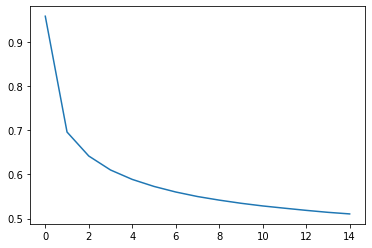

In [22]:
## Fit the model
history = doodle_model.fit (x = X_train, y = Y_train, epochs = 15, batch_size = 128)
plt.plot(history.history['loss'])

In [23]:
metric_measures = doodle_model.evaluate(x = X_test, y = Y_test)
print ("Loss = " + str(metric_measures[0]))
print ("Test Accuracy = " + str(metric_measures[1]))

10000/10000 [==============================] - 1s 69us/step
Loss = 0.5680009996652603
Test Accuracy = 0.8489


camera


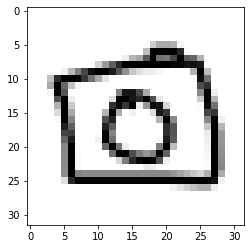

In [24]:
## Let us make a prediction with our doodle_model.
ind = 784
img = X_test[ind]
plt.imshow(img.reshape(32, 32), cmap='gray_r')
pred_pobs = doodle_model.predict(np.expand_dims(img, axis=0))
prediction = out_classes[np.argmax(pred_pobs[0, :])]
print(prediction)

In [25]:
## Save the model
%cd ..
doodle_model.save("doodle_model.h5")

/content/drive/My Drive/Projects/doodle
